<a href="https://colab.research.google.com/github/Buzzrightear/CO885_dissertation/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Univariate MLP

In [ ]:
# Mostly taken from https://gist.github.com/BenjaminPhillips22/834e7434e1a4960d851f068f9c09a9c8
#and https://machinelearningmastery.com/how-to-develop-multilayer-perceptron-models-for-time-series-forecasting/ 

import math
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Dataset

df = pd.read_csv('https://raw.githubusercontent.com/Buzzrightear/CO885_dissertation/master/wind_data_3.csv', parse_dates=['Date time']) #Read in csv to dataframe
df=df[['Date time','Power avg']].dropna()

x = np.asarray(df['Power avg'])
y = np.asarray(y)



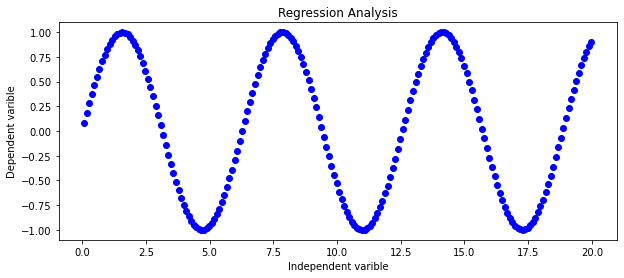

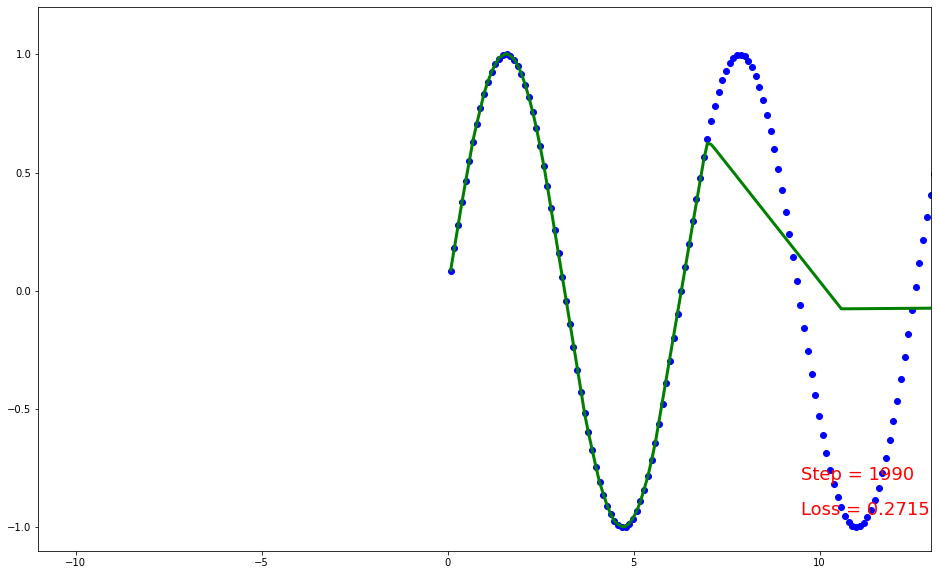

In [ ]:
x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()


# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

"""
plt.figure(figsize=(10, 4))
plt.scatter(x.data.numpy(), y.data.numpy(), color="blue")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()
"""

# another way to define a network
net = torch.nn.Sequential(
    torch.nn.Linear(1, 200),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(200, 1),
)

optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
fig, ax = plt.subplots(figsize=(16,10))

# start training
for t in range(2000):

    prediction = net(x)  # input x and predict based on x

    loss = loss_func(prediction, y)  # must be (1. nn output, 2. target)

    optimizer.zero_grad()  # clear gradients for next train
    loss.backward()  # backpropagation, compute gradients
    optimizer.step()  # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        ax.set_xlim(-11.0, 13.0)
        ax.set_ylim(-1.1, 1.2)
        ax.scatter(x.data.numpy(), y.data.numpy(), color="blue")
        ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
        ax.text(9.50, -0.8, 'Step = %d' % t, fontdict={'size': 18, 'color': 'red'})
        ax.text(9.50, -0.95, 'Loss = %.4f' % loss.data.numpy(),
                fontdict={'size': 18, 'color': 'red'})

plt.show()
